## WeatherPy

Observation 1:
The climates of Southern Hemisphere tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. 

Observation 2:
As the latidude increases or decreases, temperature drops because equatorial region receives sunlight straight.

Observation 3:
There is no correlation between latitude and wind speed. 

In [1]:
# Dependencies 
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from config import api_key

# Utilize a simple python library
from citipy import citipy

# Output File 
output_data_file = "../output_data/cities.csv"




## Generate Lists

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Generate a set of list based on random coordinates
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count ( Greater than 500 )
len(cities)

619

In [4]:
#Lists and counters
city_list = []
country_list = []
date_list = []
lats_list = []
lngs_list = []
temp_max = []
cloudiness = []
humidity = []
wind_speed = []
index_counter = 0
set_counter = 1

## Perform API calls

In [5]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        # Create variables for each response item and format to desired datatype
        # Append retreived values to lists above using the variables created above
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City was not found in the Weathermap API")
        
        

ecord 15 of Set 3 : alofi
Processing Record 16 of Set 3 : san patricio
Processing Record 17 of Set 3 : mtimbira
Processing Record 18 of Set 3 : provideniya
Processing Record 19 of Set 3 : port elizabeth
Processing Record 20 of Set 3 : hithadhoo
Processing Record 21 of Set 3 : khatanga
Processing Record 22 of Set 3 : sakaiminato
Processing Record 23 of Set 3 : rewa
Processing Record 24 of Set 3 : asyut
City was not found in the Weathermap API
City was not found in the Weathermap API
City was not found in the Weathermap API
Processing Record 25 of Set 3 : nosy varika
Processing Record 26 of Set 3 : torbay
Processing Record 27 of Set 3 : palu
Processing Record 28 of Set 3 : port macquarie
Processing Record 29 of Set 3 : tasiilaq
Processing Record 30 of Set 3 : gamba
Processing Record 31 of Set 3 : grindavik
Processing Record 32 of Set 3 : yulara
Processing Record 33 of Set 3 : roald
Processing Record 34 of Set 3 : mega
Processing Record 35 of Set 3 : ampanihy
Processing Record 36 of Set 3

## Create A dataframe

In [6]:
#Create a dataframe from the lists that we created above
weather_data = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Date" : date_list,    
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max,
    "Clouds" : cloudiness,
    "Humidity" : humidity,
    "Wind Speed" : wind_speed,
})

In [9]:
#Display dataframe
weather_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Clouds,Humidity,Wind Speed
0,Norman Wells,CA,1620875887,65.2820,-126.8329,40.28,90,81,2.30
1,Muroto-misakicho,JP,1620875944,33.2833,134.1500,71.56,100,84,10.85
2,Saskylakh,RU,1620875845,71.9167,114.0833,32.95,100,91,6.85
3,New Norfolk,AU,1620875861,-42.7826,147.0587,61.45,100,79,5.01
4,Cape Town,ZA,1620875575,-33.9258,18.4232,54.86,20,84,2.77


In [10]:
#Save weather data to a cities csv file
weather_data.to_csv("../output_data/cities.csv")

## Plotting the data

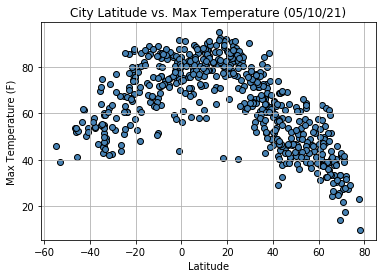

In [11]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (05/10/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Note: From this plot we can see that the max temperature is around 100 F

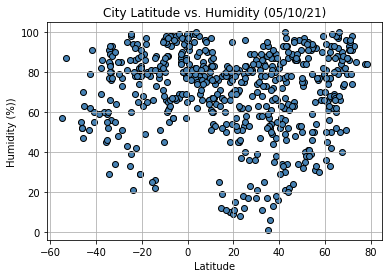

In [12]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (05/10/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("Images/City Latitude vs Humidity.png")

## Note: From this plot we can see that polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

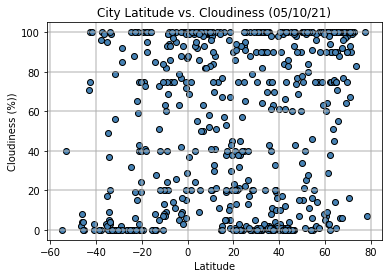

In [13]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (05/10/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Cloudiness.png")

# Note: From this plot we can see that clouds tend to form in abundance in the middle latitudes 60 degrees N and S of the equator.

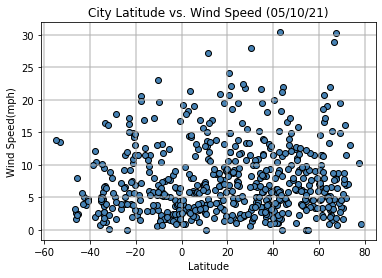

In [14]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (05/10/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Wind Speed.png")

# Note: From this plot we can see that wind speed data is widely spread across the latitude. And the highest wind speed is around 30 mph.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [16]:
 #Define a function for linear regression(slope, intercept, rvalue, pvalue, stderr) = stats.lineargress(x_values,y-value) and scatter plot
 # Get regression values

def linreg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} 05/10/21")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Images/{filename}')

## Create subset dataframes for Northern and Southern Hemispheres

In [18]:
# Create Northern and Southern Hemisphere DataFrames and store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = weather_data.Lat >= 0
crit_south = weather_data.Lat < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = weather_data[crit_north]
south_weather = weather_data[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: -0.8349860607793955
y = -0.77x + 89.99


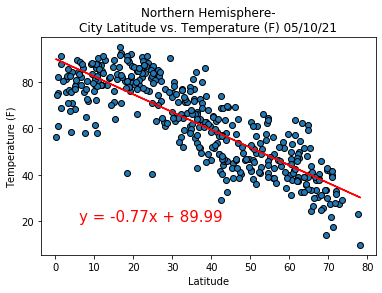

In [19]:
linreg_plot(north_weather["Lat"],north_weather["Max Temp"],\
                  'Latitude','Temperature (F)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,20)

#### Note: This scatterplot with linear regression has and r-squared value of -0.83. There is a strong negative correlation between latitude and max temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6771108447874498
y = 0.67x + 81.38


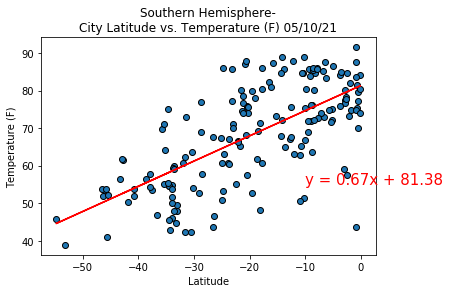

In [20]:
linreg_plot(south_weather["Lat"],south_weather["Max Temp"],\
                  'Latitude','Temperature (F)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-10,55)

#### Note: There is a strong positive  correlation between latitude and max temperature for southern hemisphere, with an r-squared value of 0.68

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.058445353698736435
y = 0.06x + 65.86


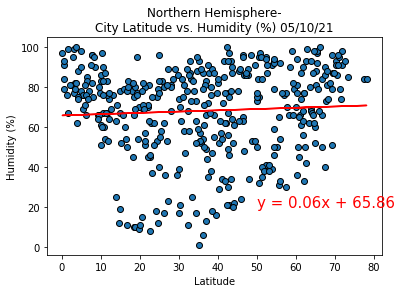

In [21]:
linreg_plot(north_weather["Lat"],north_weather["Humidity"],\
                  'Latitude','Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',50,20)

#### Note: It seems no correlation between latitude and humidity for northern hemisphere with an r-squared value of 0.06. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2845829536129057
y = 0.39x + 81.45


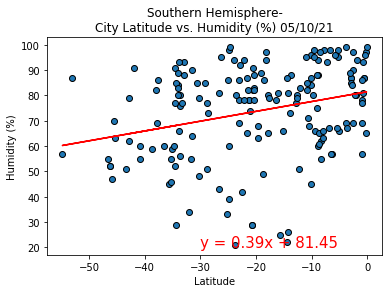

In [22]:
linreg_plot(south_weather["Lat"],south_weather["Humidity"],\
                  'Latitude','Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

#### Note: There is a  weak positive correlation between latitude and humidity for southern hemisphere with an r-squared value of 0.28.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04429987167446258
y = 0.09x + 53.57


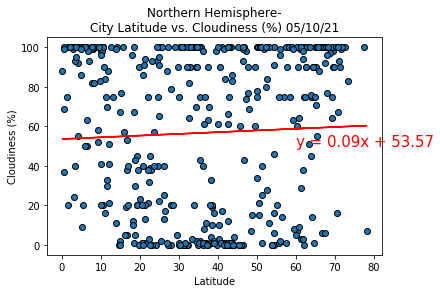

In [23]:
linreg_plot(north_weather["Lat"],north_weather["Clouds"],\
                  'Latitude','Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',60,50)

#### Note : There is no correlation between the latitude and cloudiness in the Northern Hemisphere with an r-squared value of 0.04

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3336574951774743
y = 1.01x + 63.43


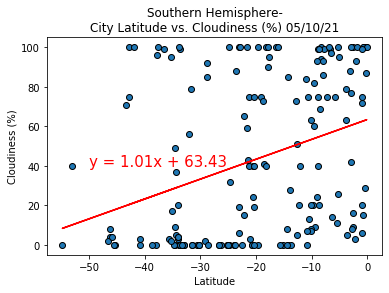

In [24]:
linreg_plot(south_weather["Lat"],south_weather["Clouds"],\
                  'Latitude','Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-50,40)

#### Note: There is a  weak between the latitude and cloudiness in the Southern Hemisphere with an r-squared value of 0.33 . 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.028329823109295157
y = -0.01x + 8.32


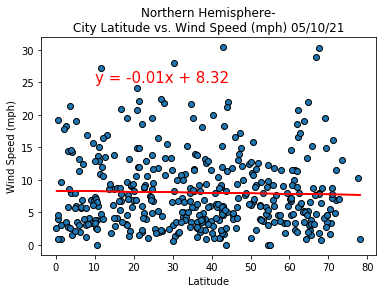

In [25]:
linreg_plot(north_weather["Lat"],north_weather["Wind Speed"],\
                  'Latitude','Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,25)

#### Note: There is no correlation between latitude and wind speed in the Northern Hemisphere. The r-squared value is -0.03.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04015547711605493
y = -0.01x + 6.31


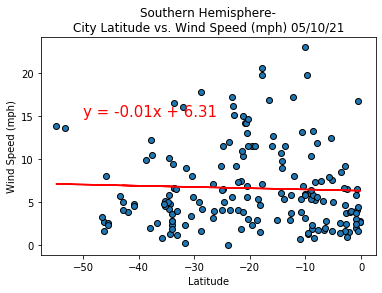

In [26]:
linreg_plot(south_weather["Lat"],south_weather["Wind Speed"],\
                  'Latitude','Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-50,15)

#### Note: There is no correlation between latitude and wind speed for southern hemisphere with r_squared value of -0.04. 